# CAPSTONE PROJECT
## Group : Explorers
### Members:
###                  Queenie Fonseca - 0749150
###                  Klenet Coelho- 0755794
###                  Ishan Mendonce- 0754926

## Loading Libraries

In [35]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
from IPython.display import Audio
import os
import sys
import warnings
import seaborn as sns
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


#import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

from tensorflow.python.keras import utils
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical
#from utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Loading Datasets

In [2]:
Ravdess = "C:/Users/queen/Documents/Sem4/Capstone/Audio_Speech_Actors_01-24"
Crema = "C:/Users/queen/Documents/Sem4/Capstone/AudioWAV"
Tess = "C:/Users/queen/Documents/Sem4/Capstone/TESS"
Savee = "C:/Users/queen/Documents/Sem4/Capstone/ALL"

### Data Exploration

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess+'/' + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess+ '/' + dir+'/'  + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()


Emotions                                               Path
0  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
1  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
2  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
3  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
4     calm  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...

In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema+'/' + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  C:/Users/queen/Documents/Sem4/Capstone/AudioWA...
1  disgust  C:/Users/queen/Documents/Sem4/Capstone/AudioWA...
2     fear  C:/Users/queen/Documents/Sem4/Capstone/AudioWA...
3    happy  C:/Users/queen/Documents/Sem4/Capstone/AudioWA...
4  neutral  C:/Users/queen/Documents/Sem4/Capstone/AudioWA...

In [5]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess +'/' + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess+ '/' + dir+'/'  + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()


Emotions                                               Path
0    angry  C:/Users/queen/Documents/Sem4/Capstone/TESS/OA...
1    angry  C:/Users/queen/Documents/Sem4/Capstone/TESS/OA...
2    angry  C:/Users/queen/Documents/Sem4/Capstone/TESS/OA...
3    angry  C:/Users/queen/Documents/Sem4/Capstone/TESS/OA...
4    angry  C:/Users/queen/Documents/Sem4/Capstone/TESS/OA...

In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee +'/'+ file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()


Emotions                                               Path
0    angry  C:/Users/queen/Documents/Sem4/Capstone/ALL/DC_...
1    angry  C:/Users/queen/Documents/Sem4/Capstone/ALL/DC_...
2    angry  C:/Users/queen/Documents/Sem4/Capstone/ALL/DC_...
3    angry  C:/Users/queen/Documents/Sem4/Capstone/ALL/DC_...
4    angry  C:/Users/queen/Documents/Sem4/Capstone/ALL/DC_...

In [7]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
1  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
2  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
3  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
4     calm  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...

### A Bar chart showing count of emotions in all the datasets combined

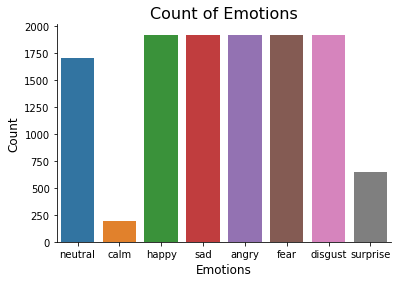

In [12]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [13]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


### Waveplot and Spectogram for audio with the emotion "Fear"

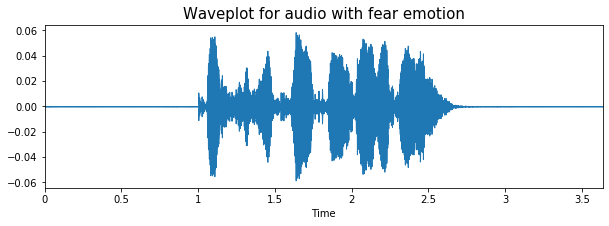

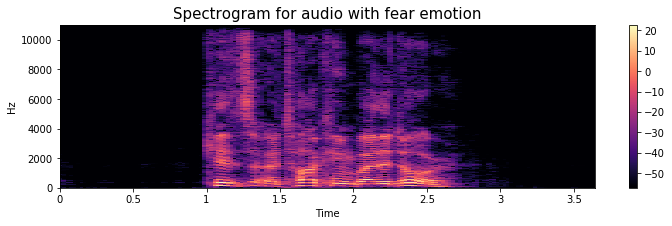

In [18]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Waveplot and Spectogram for audio with emotion "Angry"

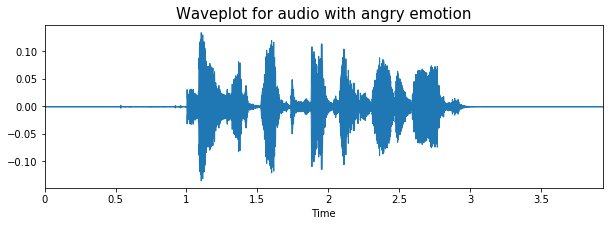

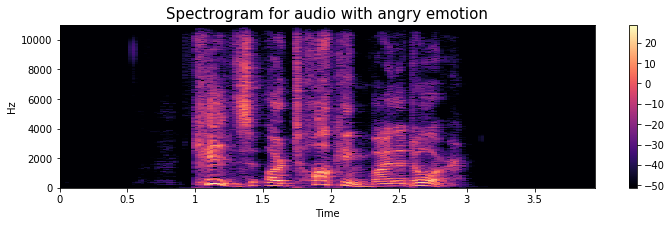

In [19]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Waveplot and spectogram with emotion "Sad"

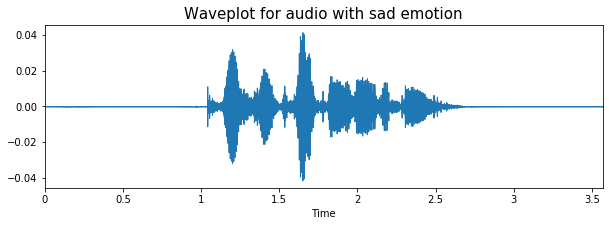

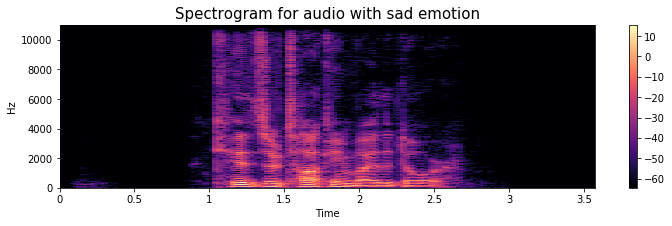

In [20]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Waveplot and Spectogram for audio with emotion "Happy"

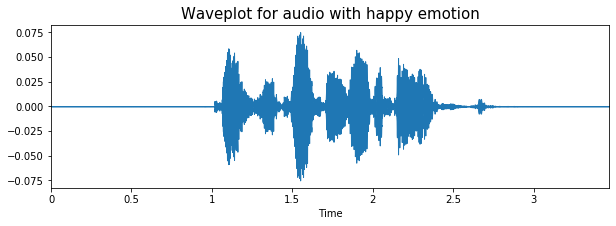

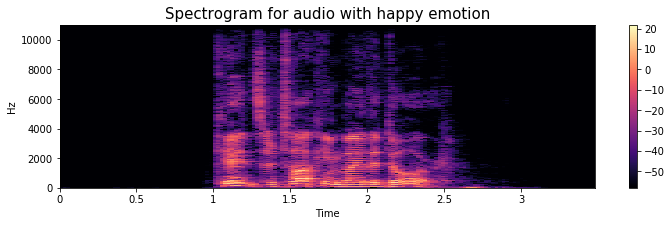

In [21]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


## Data Augmentation

In [22]:
# Adding noise
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# Stretching the audio
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

# Shifting the pitch
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

### 1. Simple audio

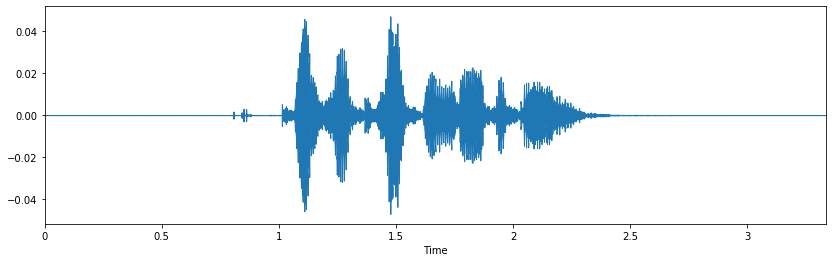

In [23]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

### 2. Adding Noise

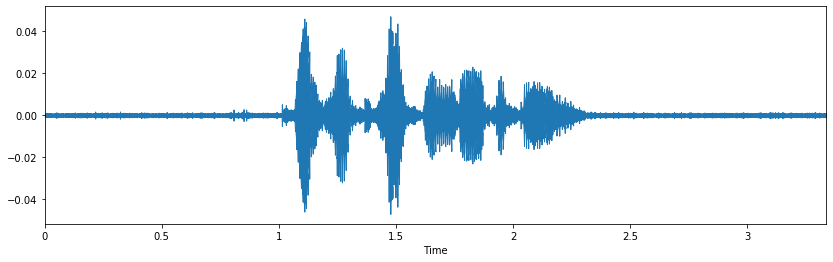

In [24]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### 3. Stretching 

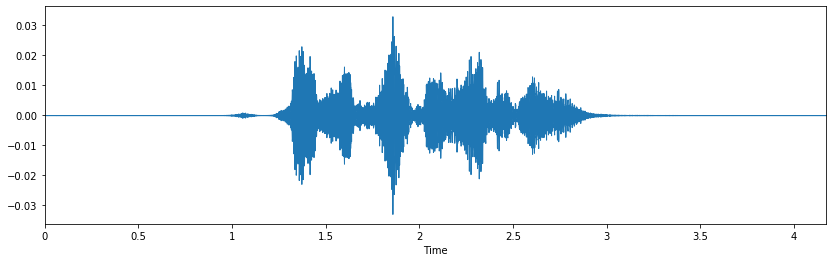

In [25]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### 4. Shifting

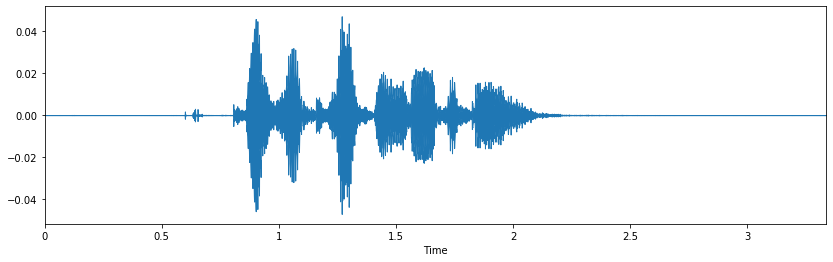

In [26]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


### 5. Pitch

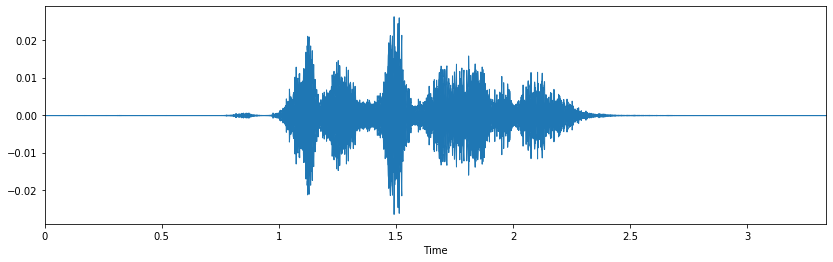

In [27]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Feature Extraction

In [28]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [29]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [30]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [32]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.300781  0.706492  0.756853  0.735217  0.731014  0.715156  0.667529   
1  0.299004  0.753655  0.798554  0.784035  0.794072  0.806013  0.728374   
2  0.176693  0.640605  0.712837  0.743736  0.714797  0.701402  0.694569   
3  0.271272  0.674966  0.723259  0.724594  0.681302  0.670643  0.674574   
4  0.331534  0.808853  0.833605  0.811467  0.795105  0.806692  0.714473   

          7         8         9  ...           153       154       155  \
0  0.673754  0.722173  0.748969  ...  4.319263e-06  0.000003  0.000002   
1  0.670412  0.710794  0.749390  ...  2.048379e-05  0.000020  0.000018   
2  0.663853  0.688527  0.742508  ...  7.999367e-07  0.000001  0.000001   
3  0.630036  0.680146  0.708276  ...  6.998011e-06  0.000007  0.000007   
4  0.664481  0.719933  0.755061  ...  1.517566e-04  0.000149  0.000154   

            156           157           158       159           160  \
0  2.286677e-06  5.131693e-06  8.065748e-06  0.000005  2.270858e-06   
1  1.883839e-05  2.252264e-05  2.426220e-05  0.000022  1.914180e-05   
2  5.350822e-07  3.480662e-07  8.398366e-07  0.000001  4.287777e-07   
3  6.999257e-06  1.217880e-05  9.449916e-06  0.000008  2.638513e-06   
4  1.498227e-04  1.497561e-04  1.577083e-04  0.000139  1.465833e-04   

            161   labels  
0  1.642365e-07  neutral  
1  1.657382e-05  neutral  
2  2.878995e-08  neutral  
3  1.788902e-07  neutral  
4  1.452285e-04  neutral  

[5 rows x 163 columns]

### Data Preparation

In [33]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [36]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [76]:
ref = pd.read_csv("C:/Users/queen/Documents/Sem4/Capstone/data_path.csv")
ref.head()

Emotions                                               Path
0  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
1  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
2  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
3  neutral  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...
4     calm  C:/Users/queen/Documents/Sem4/Capstone/Audio_S...

In [37]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [38]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [39]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

## Data Modelling 

In [40]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 81, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0

In [41]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Train on 27364 samples, validate on 9122 samples
Epoch 1/50
27364/27364 [==============================] - 69s 3ms/sample - loss: 1.6754 - accuracy: 0.3178 - val_loss: 1.4559 - val_accuracy: 0.4355
Epoch 2/50
27364/27364 [==============================] - 75s 3ms/sample - loss: 1.4314 - accuracy: 0.4276 - val_loss: 1.3122 - val_accuracy: 0.4772
Epoch 3/50
27364/27364 [==============================] - 75s 3ms/sample - loss: 1.3370 - accuracy: 0.4684 - val_loss: 1.2253 - val_accuracy: 0.5059
Epoch 4/50
27364/27364 [==============================] - 74s 3ms/sample - loss: 1.2849 - accuracy: 0.4885 - val_loss: 1.1983 - val_accuracy: 0.5172
Epoch 5/50
27364/27364 [==============================] - 80s 3ms/sample - loss: 1.2511 - accuracy: 0.5018 - val_loss: 1.2249 - val_accuracy: 0.5055
Epoch 6/50
27364/27364 [==============================] - 79s 3ms/sample - loss: 1.2171 - accuracy: 0.5103 - val_loss: 1.1582 - val_accuracy: 0.5330
Epoch 7/50
27364/27364 [==============================] -

9122/9122 [==============================] - 4s 492us/sample - loss: 1.1551 - accuracy: 0.6074
Accuracy of our model on test data :  60.74326038360596 %


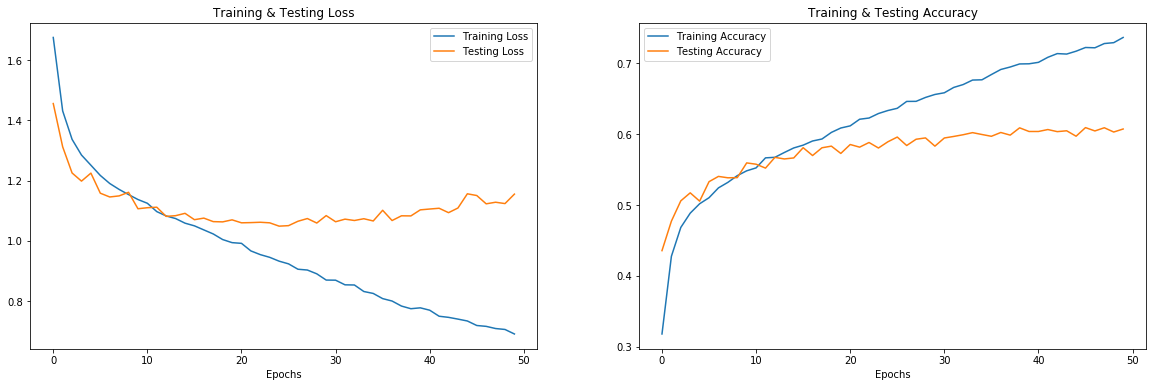

In [43]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [44]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\queen\Documents\Sem4\Capstone\saved_models\Emotion_Model.h5 


In [46]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 60.74%


In [52]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)


In [53]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad       disgust
1          disgust       disgust
2            angry         angry
3          disgust       disgust
4              sad          fear
5          disgust          fear
6            happy         happy
7            happy         happy
8          disgust           sad
9          neutral           sad

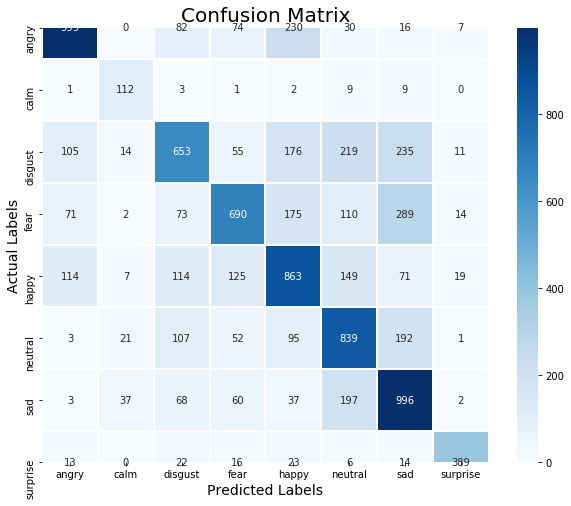

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.76      0.69      0.73      1438
        calm       0.58      0.82      0.68       137
     disgust       0.58      0.44      0.50      1468
        fear       0.64      0.48      0.55      1424
       happy       0.54      0.59      0.56      1462
     neutral       0.54      0.64      0.58      1310
         sad       0.55      0.71      0.62      1400
    surprise       0.88      0.81      0.84       483

    accuracy                           0.61      9122
   macro avg       0.63      0.65      0.63      9122
weighted avg       0.62      0.61      0.61      9122

